#### Packages to install
---

`pip install python_speech_features`

`pip install librosa`

GTZAN Data obtained from: http://marsyas.info/downloads/datasets.html

In [1]:
from python_speech_features import mfcc
import scipy.io.wavfile as wav
import numpy as np
from tempfile import TemporaryFile
import os
import pickle
import random 
import operator
import math
import numpy as np
import matplotlib.pyplot as plt
import librosa 
import librosa.display
import IPython.display as ipd

`scipy.io.wavfile.read` enables you to read a `.WAV` file as array and also outputs the sample rate of the file. Sample rate is the number of samples of audio carried per second (Hz)

### Generate visualizations
---

CPU times: user 3min 15s, sys: 279 ms, total: 3min 15s
Wall time: 3min 15s


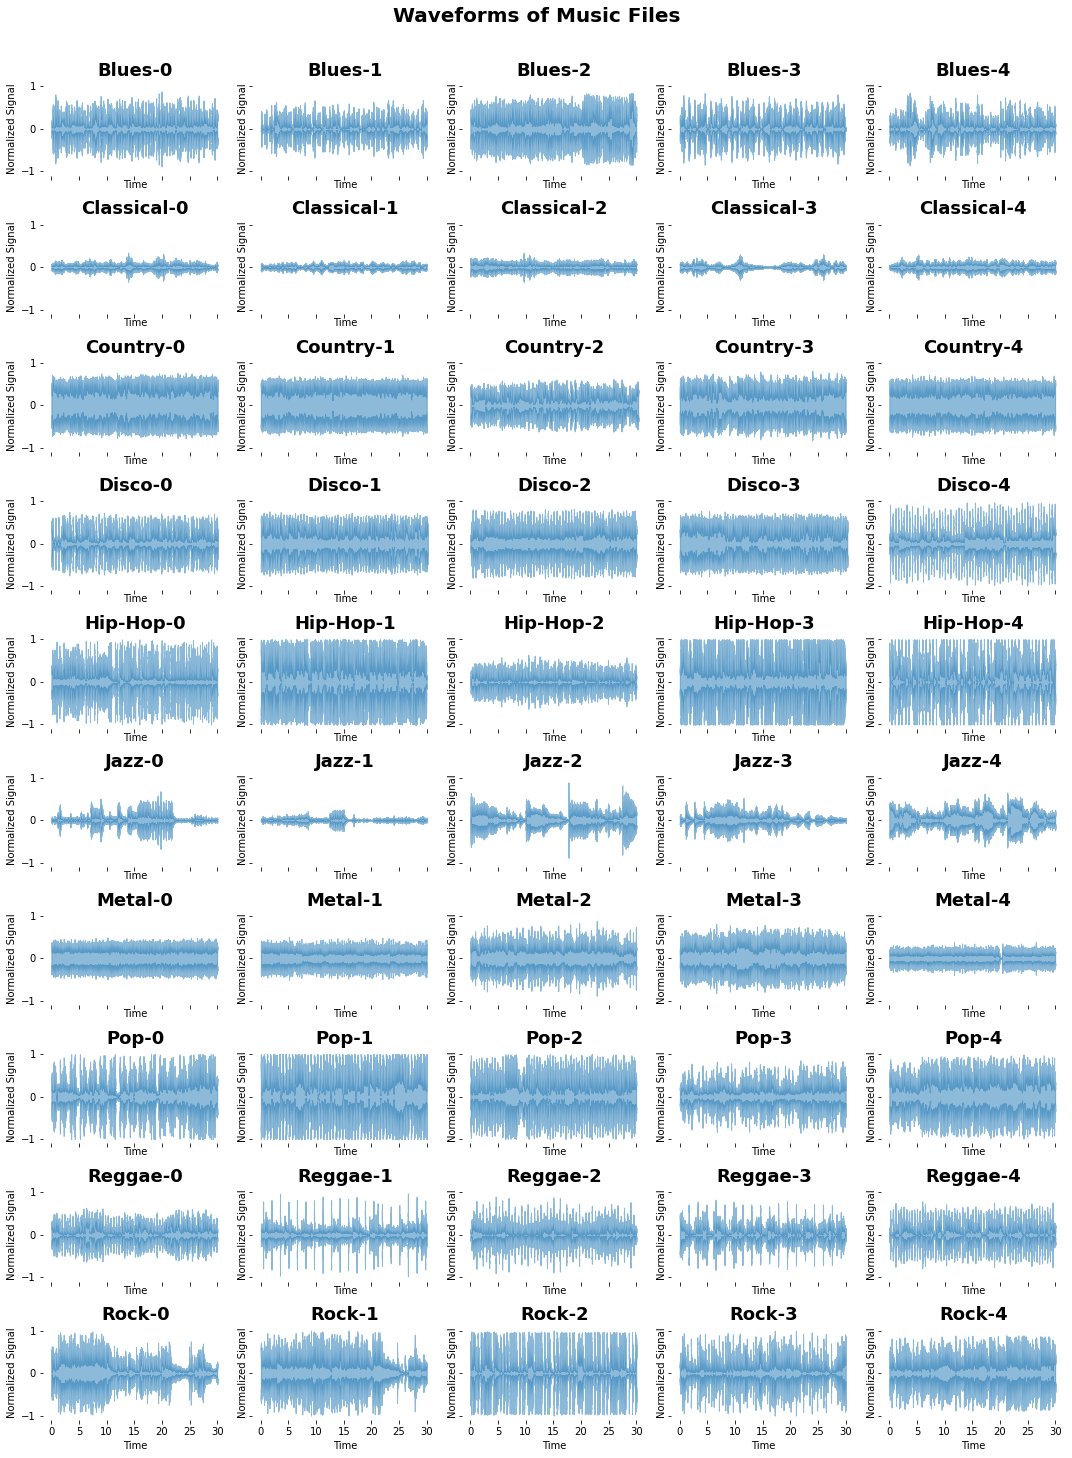

In [31]:
%%time
fig, ax = plt.subplots(figsize = (15,20), nrows = 10, ncols = 5,
                       sharex=True, sharey = True)
for i in range(5):
    sig0, _ = librosa.load(f"../data/blues/blues.0000{i}.wav")
    librosa.display.waveshow(sig0, ax = ax[0,i], alpha = 0.5)
    ax[0,i].set_title(f"Blues-{i}", weight= "bold", size = 18)
    ax[0,i].set_ylabel("Normalized Signal")
    sig1, _ = librosa.load(f"../data/classical/classical.0000{i}.wav")
    librosa.display.waveshow(sig1, ax = ax[1,i], alpha = 0.5)
    ax[1,i].set_title(f"Classical-{i}", weight= "bold", size = 18)
    ax[1,i].set_ylabel("Normalized Signal")
    sig2, _ = librosa.load(f"../data/country/country.0000{i}.wav")
    librosa.display.waveshow(sig2, ax = ax[2,i], alpha = 0.5)
    ax[2,i].set_title(f"Country-{i}", weight= "bold", size = 18)
    ax[2,i].set_ylabel("Normalized Signal")
    sig3, _ = librosa.load(f"../data/disco/disco.0000{i}.wav")
    librosa.display.waveshow(sig3, ax = ax[3,i], alpha = 0.5)
    ax[3,i].set_title(f"Disco-{i}", weight= "bold", size = 18)
    ax[3,i].set_ylabel("Normalized Signal")
    sig4, _ = librosa.load(f"../data/hiphop/hiphop.0000{i}.wav")
    librosa.display.waveshow(sig4, ax = ax[4,i], alpha = 0.5)
    ax[4,i].set_title(f"Hip-Hop-{i}", weight= "bold", size = 18)
    ax[4,i].set_ylabel("Normalized Signal")
    sig5, _ = librosa.load(f"../data/jazz/jazz.0000{i}.wav")
    librosa.display.waveshow(sig5, ax = ax[5,i], alpha = 0.5)
    ax[5,i].set_title(f"Jazz-{i}", weight= "bold", size = 18)
    ax[5,i].set_ylabel("Normalized Signal")
    sig6, _ = librosa.load(f"../data/metal/metal.0000{i}.wav")
    librosa.display.waveshow(sig6, ax = ax[6,i], alpha = 0.5)
    ax[6,i].set_title(f"Metal-{i}", weight= "bold", size = 18)
    ax[6,i].set_ylabel("Normalized Signal")
    sig7, _ = librosa.load(f"../data/pop/pop.0000{i}.wav")
    librosa.display.waveshow(sig7, ax = ax[7,i], alpha = 0.5)
    ax[7,i].set_title(f"Pop-{i}", weight= "bold", size = 18)
    ax[7,i].set_ylabel("Normalized Signal")
    sig8, _ = librosa.load(f"../data/reggae/reggae.0000{i}.wav")
    librosa.display.waveshow(sig8, ax = ax[8,i], alpha = 0.5)
    ax[8,i].set_title(f"Reggae-{i}", weight= "bold", size = 18)
    ax[8,i].set_ylabel("Normalized Signal")
    sig9, _ = librosa.load(f"../data/rock/rock.0000{i}.wav")
    librosa.display.waveshow(sig9, ax = ax[9,i], alpha = 0.5)
    ax[9,i].set_title(f"Rock-{i}", weight= "bold", size = 18)
    ax[9,i].set_ylabel("Normalized Signal")
for i in range(5):
    for j in range(10):
        ax[j,i].spines['top'].set_visible(False)
        ax[j,i].spines['right'].set_visible(False)
        ax[j,i].spines['bottom'].set_visible(False)
        ax[j,i].spines['left'].set_visible(False)
plt.suptitle("Waveforms of Music Files", weight= "bold", size = 20, y = 1.01)
plt.tight_layout()

CPU times: user 40.2 s, sys: 3.71 s, total: 43.9 s
Wall time: 6.1 s


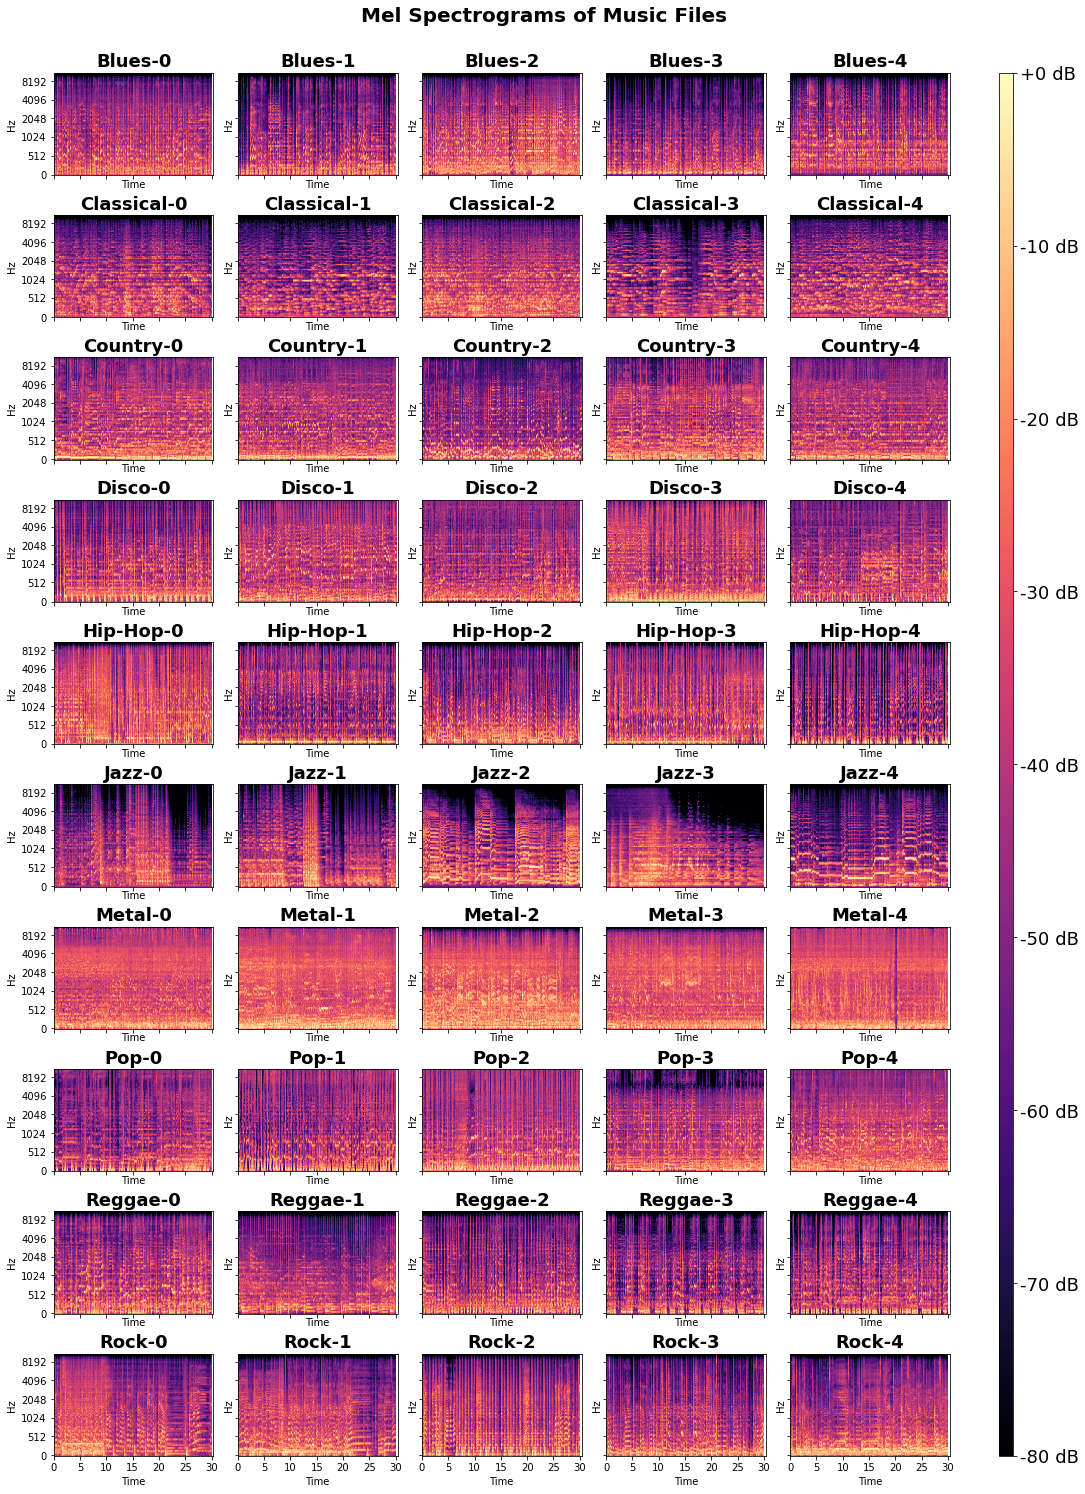

In [34]:
%%time
fig, ax = plt.subplots(figsize = (15,20), nrows = 10, ncols = 5,
                       sharex=True, sharey = True, 
                       constrained_layout = True)
for i in range(5):
    sig0, sr0 = librosa.load(f"../data/blues/blues.0000{i}.wav")
    Dm0 = librosa.feature.melspectrogram(y=sig0, sr=sr0)
    mel0 = librosa.display.specshow(
        librosa.power_to_db(Dm0,ref=np.max), 
        y_axis='mel', x_axis='time', ax = ax[0,i], vmin = -80, vmax = 0)
    ax[0,i].set_title(f"Blues-{i}", weight= "bold", size = 18)
    
    sig1, sr1 = librosa.load(f"../data/classical/classical.0000{i}.wav")
    Dm1 = librosa.feature.melspectrogram(y=sig1, sr=sr1)
    librosa.display.specshow(
        librosa.power_to_db(Dm1,ref=np.max), 
        y_axis='mel', x_axis='time', ax = ax[1,i])
    ax[1,i].set_title(f"Classical-{i}", weight= "bold", size = 18)
    
    sig2, sr2 = librosa.load(f"../data/country/country.0000{i}.wav")
    Dm2 = librosa.feature.melspectrogram(y=sig2, sr=sr2)
    librosa.display.specshow(
        librosa.power_to_db(Dm2,ref=np.max), 
        y_axis='mel', x_axis='time', ax = ax[2,i])
    ax[2,i].set_title(f"Country-{i}", weight= "bold", size = 18)
    
    sig3, sr3 = librosa.load(f"../data/disco/disco.0000{i}.wav")
    Dm3 = librosa.feature.melspectrogram(y=sig3, sr=sr3)
    librosa.display.specshow(
        librosa.power_to_db(Dm3,ref=np.max), 
        y_axis='mel', x_axis='time', ax = ax[3,i])
    ax[3,i].set_title(f"Disco-{i}", weight= "bold", size = 18)
    
    sig4, sr4 = librosa.load(f"../data/hiphop/hiphop.0000{i}.wav")
    Dm4 = librosa.feature.melspectrogram(y=sig4, sr=sr4)
    librosa.display.specshow(
        librosa.power_to_db(Dm4,ref=np.max), 
        y_axis='mel', x_axis='time', ax = ax[4,i])
    ax[4,i].set_title(f"Hip-Hop-{i}", weight= "bold", size = 18)
    
    sig5, sr5 = librosa.load(f"../data/jazz/jazz.0000{i}.wav")
    Dm5 = librosa.feature.melspectrogram(y=sig5, sr=sr5)
    librosa.display.specshow(
        librosa.power_to_db(Dm5,ref=np.max), 
        y_axis='mel', x_axis='time', ax = ax[5,i])
    ax[5,i].set_title(f"Jazz-{i}", weight= "bold", size = 18)
    
    sig6, sr6 = librosa.load(f"../data/metal/metal.0000{i}.wav")
    Dm6 = librosa.feature.melspectrogram(y=sig6, sr=sr6)
    librosa.display.specshow(
        librosa.power_to_db(Dm6,ref=np.max), 
        y_axis='mel', x_axis='time', ax = ax[6,i])
    ax[6,i].set_title(f"Metal-{i}", weight= "bold", size = 18)
    
    sig7, sr7 = librosa.load(f"../data/pop/pop.0000{i}.wav")
    Dm7 = librosa.feature.melspectrogram(y=sig7, sr=sr7)
    librosa.display.specshow(
        librosa.power_to_db(Dm7,ref=np.max), 
        y_axis='mel', x_axis='time', ax = ax[7,i])
    ax[7,i].set_title(f"Pop-{i}", weight= "bold", size = 18)
    
    sig8, sr8 = librosa.load(f"../data/reggae/reggae.0000{i}.wav")
    Dm8 = librosa.feature.melspectrogram(y=sig8, sr=sr8)
    librosa.display.specshow(
        librosa.power_to_db(Dm8,ref=np.max), 
        y_axis='mel', x_axis='time', ax = ax[8,i])
    ax[8,i].set_title(f"Reggae-{i}", weight= "bold", size = 18)
    
    sig9, sr9 = librosa.load(f"../data/rock/rock.0000{i}.wav")
    Dm9 = librosa.feature.melspectrogram(y=sig9, sr=sr9)
    librosa.display.specshow(
        librosa.power_to_db(Dm9,ref=np.max), 
        y_axis='mel', x_axis='time', ax = ax[9,i])
    ax[9,i].set_title(f"Rock-{i}", weight= "bold", size = 18)

# fig.subplots_adjust(right=0.8)
plt.suptitle("Mel Spectrograms of Music Files", weight= "bold", size = 20, y = 1.03)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(mel0,format='%+2.0f dB', ax = ax.ravel().tolist(),
                   aspect = 100)
cbar.ax.tick_params(labelsize = 18)
# plt.tight_layout()
# plt.show()


#####  Reading in Files
---
Blues is a mono channel

In [3]:
ipd.Audio("../data/blues/blues.00001.wav")

In [4]:
# get rate and values a numpy arrray
blue_rate, blue_sig = wav.read("../data/blues/blues.00099.wav")

In [5]:
blue_rate

22050

In [7]:
time = np.arange(0,blue_sig.shape[0],1)/blue_rate
print(time)

[0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 3.00131973e+01
 3.00132426e+01 3.00132880e+01]


In [8]:
blue_sig

array([-109, -372, -262, ...,  283,  624,  980], dtype=int16)

In [9]:
blue_sig.shape

(661794,)

In [10]:
# checks out that the number of samples/sample rate yields time
blue_sig.shape[0]/blue_rate 

30.013333333333332

Text(0.5, 1.0, 'Original Waveform of Blues-99')

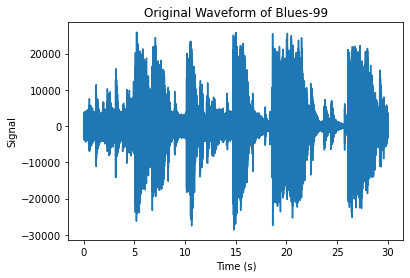

In [11]:
plt.plot(time, blue_sig)
plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.title("Original Waveform of Blues-99")

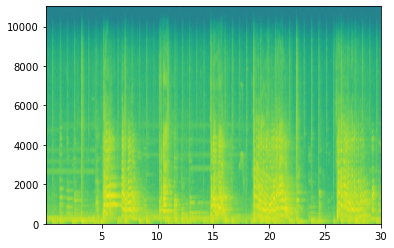

In [12]:
fig = plt.specgram(blue_sig, Fs =blue_rate, NFFT = 256)

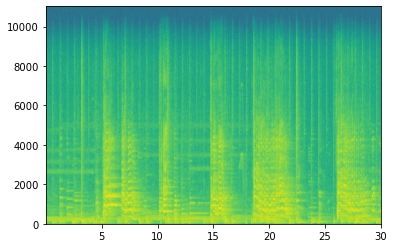

In [13]:
fig = plt.specgram(blue_sig, Fs =blue_rate, NFFT = 512)

(1025, 344)

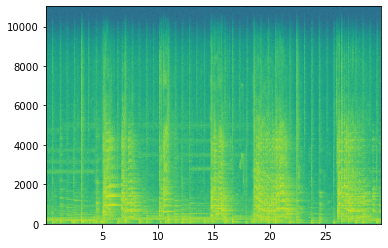

In [14]:
fig = plt.specgram(blue_sig, Fs =blue_rate, NFFT = 2048)
fig[0].shape

##### Using Librosa
---
normalizes data between -1 and 1

https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html

https://stackoverflow.com/questions/50062358/difference-between-load-of-librosa-and-read-of-scipy-io-wavfile/50063416

In [15]:
blue_sig/2**15

array([-0.00332642, -0.01135254, -0.00799561, ...,  0.00863647,
        0.01904297,  0.02990723])

In [16]:
blue_sig1, blue_sr1 = librosa.load("../data/blues/blues.00099.wav",sr=None)
blue_sig1.shape

(661794,)

In [17]:
blue_sig1

array([-0.00332642, -0.01135254, -0.00799561, ...,  0.00863647,
        0.01904297,  0.02990723], dtype=float32)

Text(12.25, 0.5, 'Normalized Signal')

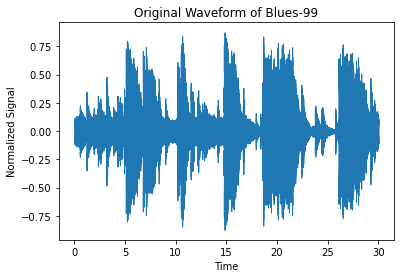

In [18]:
librosa.display.waveshow(blue_sig1)
plt.title("Original Waveform of Blues-99")
plt.ylabel("Normalized Signal")

https://www.kaggle.com/code/andradaolteanu/work-w-audio-data-visualise-classify-recommend

Shape of D object: (1025, 1293)


Text(0.5, 1.0, 'color coloresponds to each of the windows')

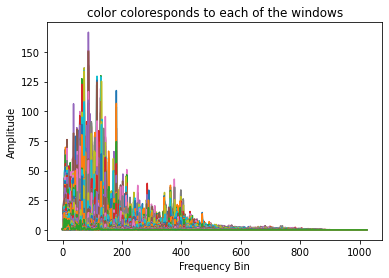

In [19]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(blue_sig1, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))
plt.plot(D)
plt.xlabel("Frequency Bin")
plt.ylabel("Amplitude")
plt.title("color coloresponds to each of the windows")

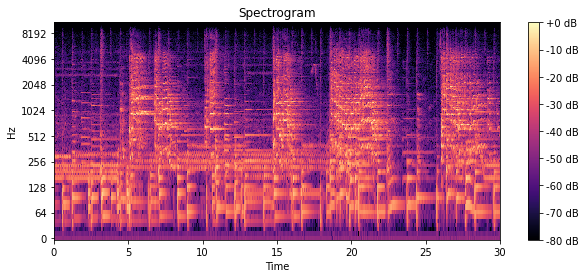

In [34]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max)
                         , sr=blue_sr1, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

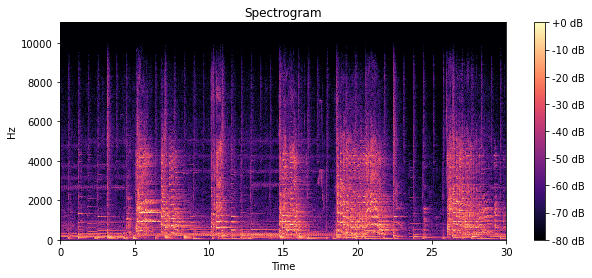

In [35]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max)
                         , sr=blue_sr1, x_axis='time', y_axis='hz');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

Not valid to do mel-scale for linaer-spectrogram

https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html

Mel spectrogram is better suited for music classification & speech recognition whereas linear spectrograms are better for cases where each frequency has equal importance. 

https://librosa.org/doc/main/generated/librosa.power_to_db.html

converts from power spectrogram (amplitude squared to dB) where the maximum value is scaled to a db of 0.


power_to_db(S^2) = amplitude_to_db(S)

In [31]:
D = np.abs(librosa.stft(blue_sig1, n_fft = n_fft, hop_length = hop_length))
librosa.feature.melspectrogram(S=D)

array([[1.2608074e-01, 9.2666455e-02, 7.8772686e-02, ..., 2.2506461e-02,
        2.9493650e-02, 1.2748067e-01],
       [2.0670363e-01, 1.8365656e-01, 1.3431431e-01, ..., 5.8418447e-01,
        5.7892317e-01, 5.3372329e-01],
       [1.5556496e-01, 2.0357077e-01, 2.2433858e-01, ..., 6.4324784e-01,
        6.4987099e-01, 5.4605770e-01],
       ...,
       [9.1496200e-05, 7.0760354e-05, 5.7653218e-05, ..., 3.3857905e-05,
        1.5648436e-04, 1.1280267e-03],
       [8.8961133e-05, 4.9124425e-05, 2.5041740e-05, ..., 2.5173871e-05,
        1.5143739e-04, 1.0953175e-03],
       [8.6144981e-05, 4.5309218e-05, 1.8622093e-05, ..., 2.0827216e-05,
        1.4915140e-04, 1.0806835e-03]], dtype=float32)

In [25]:
D.shape

(1025, 1293)

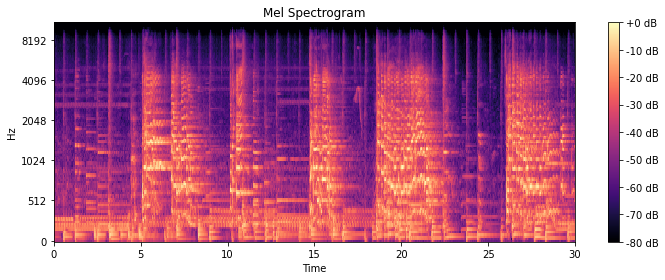

In [50]:
Dm = librosa.feature.melspectrogram(y=blue_sig1, sr=blue_sr1)
plt.figure(figsize=(10, 4))
librosa.display.specshow(
    librosa.power_to_db(Dm,ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()

In [53]:
librosa.power_to_db(Dm,ref=np.max)

array([[-37.091316, -37.80434 , -39.341984, ..., -51.9753  , -48.960842,
        -37.054756],
       [-33.499626, -33.835476, -36.602932, ..., -21.956135, -22.262117,
        -24.326267],
       [-35.619617, -32.88342 , -31.894297, ..., -21.53412 , -21.79411 ,
        -24.130316],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -78.78346 ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -79.041595],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -79.15755 ]], dtype=float32)

In [28]:
Dm.shape

(128, 1293)

### Feature Extraction
---
https://towardsdatascience.com/how-i-understood-what-features-to-consider-while-training-audio-files-eedfb6e9002b

https://stackoverflow.com/questions/60492462/mfcc-python-completely-different-result-from-librosa-vs-python-speech-features


##### Mel Frequency Cepstral Coefficient (MFCC)
---
Commonly used for speech recognition but also prevalent in applications of genre-classification. 
Essentially has 5 main steps:  
1. Take the Fourier transform of (a windowed excerpt of) a signal.
2. Map the powers of the spectrum obtained above onto the mel scale, using triangular overlapping windows or alternatively, cosine overlapping windows.
    * Mel scale relates perceived frequency, pitch, to its actual frequency 
    * Use mel fiterbank that accounts for better differentiation at lower frequencies than higher.
3. Take the logs of the powers at each of the mel frequencies.
4. Take the discrete cosine transform of the list of mel log powers, as if it were a signal.
5. The MFCCs are the amplitudes of the resulting spectrum.

Sources:

* https://en.wikipedia.org/wiki/Mel-frequency_cepstrum#:~:text=Mel%2Dfrequency%20cepstral%20coefficients%20(MFCCs,%2Da%2Dspectrum%22).
* http://www.practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/
* https://www.analyticsvidhya.com/blog/2021/06/mfcc-technique-for-speech-recognition/
* https://jonathan-hui.medium.com/speech-recognition-feature-extraction-mfcc-plp-5455f5a69dd9

In [40]:
blue_features = mfcc(blue_sig, blue_rate, winlen = 0.025)#, nfft = 551)

In [41]:
blue_features.shape

(2994, 13)

In [26]:
661794/2994

221.04008016032063

In [27]:
np.cov(blue_features).shape

(2994, 2994)

In [28]:
np.cov(blue_features.T).shape

(13, 13)

In [29]:
blue_features.mean(1).shape

(2994,)

In [30]:
661794/551

1201.0780399274047

In [33]:
30/0.025

1200.0

#### References
* https://towardsdatascience.com/music-genre-classification-with-python-c714d032f0d8
* https://www.analyticsvidhya.com/blog/2021/06/visualizing-sounds-librosa/

